In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def BruteForcePareto(functions, lb, ub, varNum = 100):
    pareto_front_ids = []
    
    dim = len(lb)
    fNum = len(functions)

    # Initialzing function variables as random n-dimensional points with values between lower and upper bounds
    x = np.random.random((varNum, dim)) * (ub - lb) + lb

    # Calculating function values of said variables
    y = np.empty((varNum, fNum))
    for i in range(varNum):
        for j in range(fNum):
            y[i, j] = np.array(functions[j](x[i]))
        
    for i in range(varNum):
        is_pareto_optimal = True
        # Checking if any other variable completely dominates the current one
        for j in range(varNum):
            if i != j:
                is_dominated = True
                for k in range(fNum):
                    is_dominated &= y[:,k][i] > y[:,k][j]
                if is_dominated:
                    is_pareto_optimal = False
                    break
        if is_pareto_optimal:
            # Keeping indices of pareto_optimal points
            pareto_front_ids.append(i)

    # Plotting results
    if fNum == 2:
        plt.xlabel('f1(x)')
        plt.ylabel('f2(x)')
        plt.scatter(y[:,0], y[:,1])
        plt.scatter(y[pareto_front_ids[:], 0], y[pareto_front_ids[:],1], label = 'pareto_front')
        plt.legend()
    elif fNum == 3:
        ax = plt.figure().add_subplot(projection='3d')
        ax.set_xlabel('f1(x)')
        ax.set_ylabel('f2(x)')
        ax.set_zlabel('f3(x)')
        ax.scatter(y[:,0], y[:,1], y[:,2])
        ax.scatter(y[pareto_front_ids[:], 0], y[pareto_front_ids[:],1], y[pareto_front_ids[:],2], label = 'pareto_front')
        ax.legend()
    else:
        print("Too many dimensions to plot!")

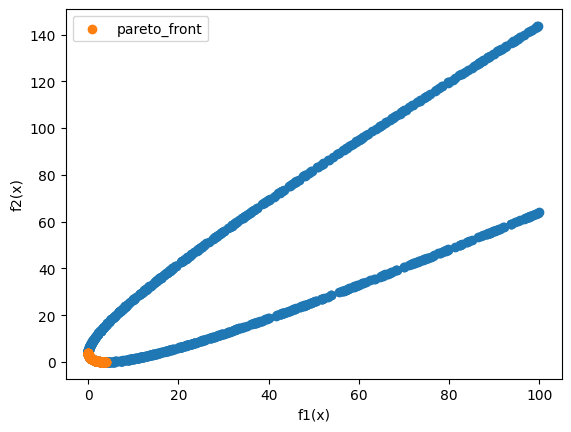

In [3]:
# Schaffer function N.1
# -A <= X <= A, where A is between 10 and 10e5, higher A's increasing the difficulty of the problem

def f1(x):
    return x[0]**2

def f2(x):
    return (x[0]-2)**2

A = 10
lower_bounds = np.array([-A])
upper_bounds = np.array([A])
varNum = 1000

BruteForcePareto(functions=[f1, f2], lb=lower_bounds, ub=upper_bounds, varNum=varNum)

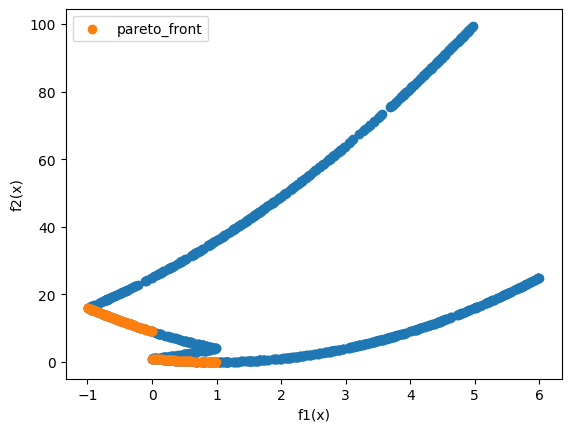

In [4]:
# Schaffer function N.2
# -5 <= x <= 10

def f1(x):
    if x[0] <= 1:
        return -x[0]
    elif x[0] <= 3:
        return x[0] - 2
    elif x[0] <= 4:
        return 4 - x[0]
    else:
        return x[0] - 4
        
def f2(x):
    return (x[0] - 5)**2

lower_bounds = np.array([-5])
upper_bounds = np.array([10])
varNum = 1000

BruteForcePareto(functions=[f1, f2], lb=lower_bounds, ub=upper_bounds, varNum=varNum)

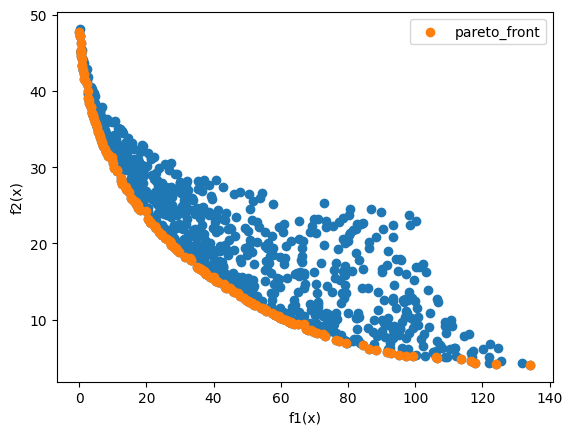

In [5]:
# Bihn and Korn function without constraints
# 0 <= x <= 5
# 0 <= y <= 3

def f1(x):
    return 4*(x[0]**2 + x[1]**2)

def f2(x):
    return (x[0]-5)**2 + (x[1]-5)**2

lower_bounds = np.array([0, 0])
upper_bounds = np.array([5, 3])
varNum = 1000

BruteForcePareto(functions=[f1, f2], lb=lower_bounds, ub=upper_bounds, varNum=varNum)

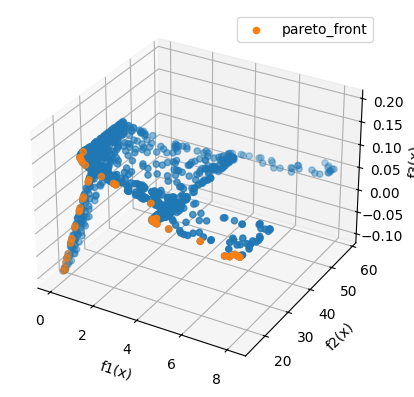

In [8]:
# Viennet function
# -3 <= x,y <= 3

def f1(x):
    return 0.5*(x[0]**2 + x[1]**2) + np.sin(x[0]**2 + x[1]**2)

def f2(x):
    return ((3*x[0] - 2*x[1] + 4)**2)/8 + ((x[0] - x[1] + 1)**2)/27 + 15

def f3(x):
    return 1/(x[0]**2 + x[1]**2 + 1) - 1.1*np.exp(-(x[0]**2+x[1]**2))

lower_bounds = np.array([-3, -3])
upper_bounds = np.array([3, 3])
varNum = 1000

BruteForcePareto(functions=[f1, f2, f3], lb=lower_bounds, ub=upper_bounds, varNum=varNum)